In [1]:
import pynbody
import pandas as pd
import numpy as np
import pickle
import sys
import tqdm
import os

hubble =  0.6776942783267969

# h148 28
# h148 37
# h148 68
# h242 80
# h229 20
# h229 22
# h242 24
# h148 13


def get_stored_filepaths_haloids(sim,z0haloid):
    # get snapshot paths and haloids from stored file
    with open('../../Data/filepaths_haloids.pickle','rb') as f:
        d = pickle.load(f)
    try:
        filepaths = d['filepaths'][sim]
    except KeyError:
        print("sim must be one of 'h148','h229','h242','h329'")
        raise
    try:
        haloids = d['haloids'][sim][z0haloid]
        h1ids = d['haloids'][sim][1]
    except KeyError:
        print('z0haloid not found, perhaps this is a halo that has no stars at z=0, and therefore isnt tracked')
        raise
    return filepaths,haloids,h1ids
    

In [2]:
get_stored_filepaths_haloids('h229',22)

(['/home/christenc/Data/Sims/h229.cosmo50PLK.3072g/h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h229.cosmo50PLK.3072gst5HbwK1BH.004096',
  '/home/christenc/Data/Sims/h229.cosmo50PLK.3072g/h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h229.cosmo50PLK.3072gst5HbwK1BH.004032',
  '/home/christenc/Data/Sims/h229.cosmo50PLK.3072g/h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h229.cosmo50PLK.3072gst5HbwK1BH.003936',
  '/home/christenc/Data/Sims/h229.cosmo50PLK.3072g/h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h229.cosmo50PLK.3072gst5HbwK1BH.003840',
  '/home/christenc/Data/Sims/h229.cosmo50PLK.3072g/h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h229.cosmo50PLK.3072gst5HbwK1BH.003744',
  '/home/christenc/Data/Sims/h229.cosmo50PLK.3072g/h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h229.cosmo50PLK.3072gst5HbwK1BH.003648',
  '/home/christenc/Data/Sims/h229.cosmo50PLK.3072g/h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h229.cosmo50PLK.3072gst5Hb

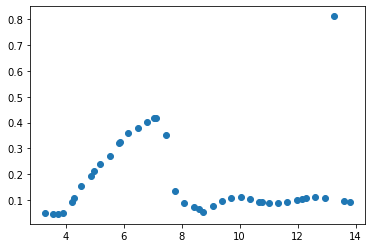

In [23]:
key = 'h229_22'
path = '../../Data/tracked_particles.hdf5'

data = pd.read_hdf(path, key=key)

import matplotlib.pyplot as plt

frac_IGM = np.array([])
for t in np.unique(data.time):
    d = data[data.time==t]
    IGM = np.array(d.r_rel_host_per_Rvir) > 1
    mass = np.array(d.mass)
    frac_IGM = np.append(frac_IGM, np.sum(mass[IGM])/np.sum(mass))
    

plt.scatter(np.unique(data.time), frac_IGM)

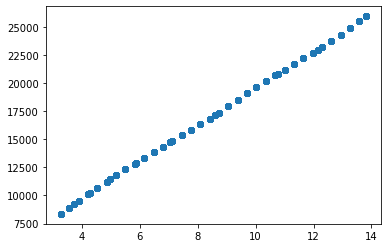

In [25]:
plt.scatter(data.time, data.sat_Xc)

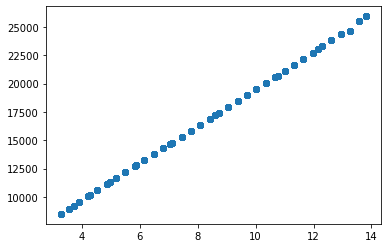

In [26]:
plt.scatter(data.time, data.host_Xc)

[ 3.28891666  3.28891666  3.28891666 ... 13.26207202 13.26207202
 13.26207202]


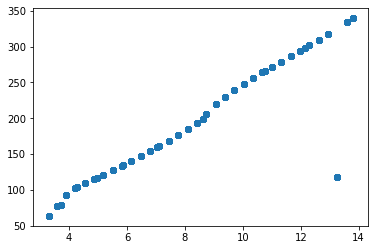

In [29]:
plt.scatter(data.time, data.hostRvir)

print(np.array(data.time)[np.array(data.hostRvir) < 150])

In [9]:
data.keys()

Index(['time', 'pid', 'rho', 'temp', 'mass', 'coolontime', 'r', 'r_per_Rvir',
       'x', 'y', 'z', 'satRvir', 'a', 'vx', 'vy', 'vz', 'v', 'r_rel_host',
       'r_rel_host_per_Rvir', 'x_rel_host', 'y_rel_host', 'z_rel_host',
       'hostRvir', 'vx_rel_host', 'vy_rel_host', 'vz_rel_host', 'v_rel_host',
       'sat_Xc', 'sat_Yc', 'sat_Zc', 'sat_vx', 'sat_vy', 'sat_vz', 'host_Xc',
       'host_Yc', 'host_Zc', 'host_vx', 'host_vy', 'host_vz', 'sat_Mstar',
       'sat_Mgas', 'host_Mstar', 'host_Mgas', 'K_sat', 'U_sat', 'ratio_sat',
       'K_host', 'U_host', 'ratio_host'],
      dtype='object')

In [30]:
np.unique(data.time)

array([ 3.28891666,  3.56501346,  3.73336517,  3.88824875,  4.21148403,
        4.28219175,  4.53471932,  4.8579546 ,  4.9758008 ,  5.18118989,
        5.50442517,  5.82766046,  5.86806487,  6.15089574,  6.47413103,
        6.79736632,  7.03979278,  7.1206016 ,  7.44383689,  7.76707217,
        8.09030746,  8.41354274,  8.60883073,  8.73677803,  9.06001331,
        9.3832486 ,  9.70648388, 10.02971917, 10.35295445, 10.67618974,
       10.76709966, 10.99942502, 11.32266031, 11.64589559, 11.96913088,
       12.15095073, 12.29236617, 12.61560145, 12.93883674, 13.26207202,
       13.58530731, 13.8007975 ])